### Prediction on persistancy/non-persistancy of drug

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading and reading of dataset


In [2]:
mydata=pd.read_csv('/content/Persistent_vs_NonPersistent (1).csv')
mydata

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,NaN,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,Y,N,Y,Y,N,N,N,Y,N,Y,Y,N,N,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unkno

# Descriptive Analysis of dataset

In [3]:
mydata.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [4]:
 mydata.nunique().sample(10)

Risk_Patient_Parent_Fractured_Their_Hip                                2
Change_T_Score                                                         4
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx     2
Concom_Fluoroquinolones                                                2
Comorb_Encounter_For_Immunization                                      2
Risk_Low_Calcium_Intake                                                2
Concom_Macrolides_And_Similar_Types                                    2
Gluco_Record_During_Rx                                                 2
Dexa_Freq_During_Rx                                                   58
Risk_Recurring_Falls                                                   2
dtype: int64

In [5]:
mydata.isnull().sum().head(20)

Ptid                        0
Persistency_Flag            0
Gender                      0
Race                        0
Ethnicity                   0
Region                      0
Age_Bucket                  0
Ntm_Speciality              0
Ntm_Specialist_Flag         0
Ntm_Speciality_Bucket       0
Gluco_Record_Prior_Ntm      0
Gluco_Record_During_Rx      0
Dexa_Freq_During_Rx         0
Dexa_During_Rx              0
Frag_Frac_Prior_Ntm         0
Frag_Frac_During_Rx         0
Risk_Segment_Prior_Ntm      0
Tscore_Bucket_Prior_Ntm     0
Risk_Segment_During_Rx      0
Tscore_Bucket_During_Rx    23
dtype: int64

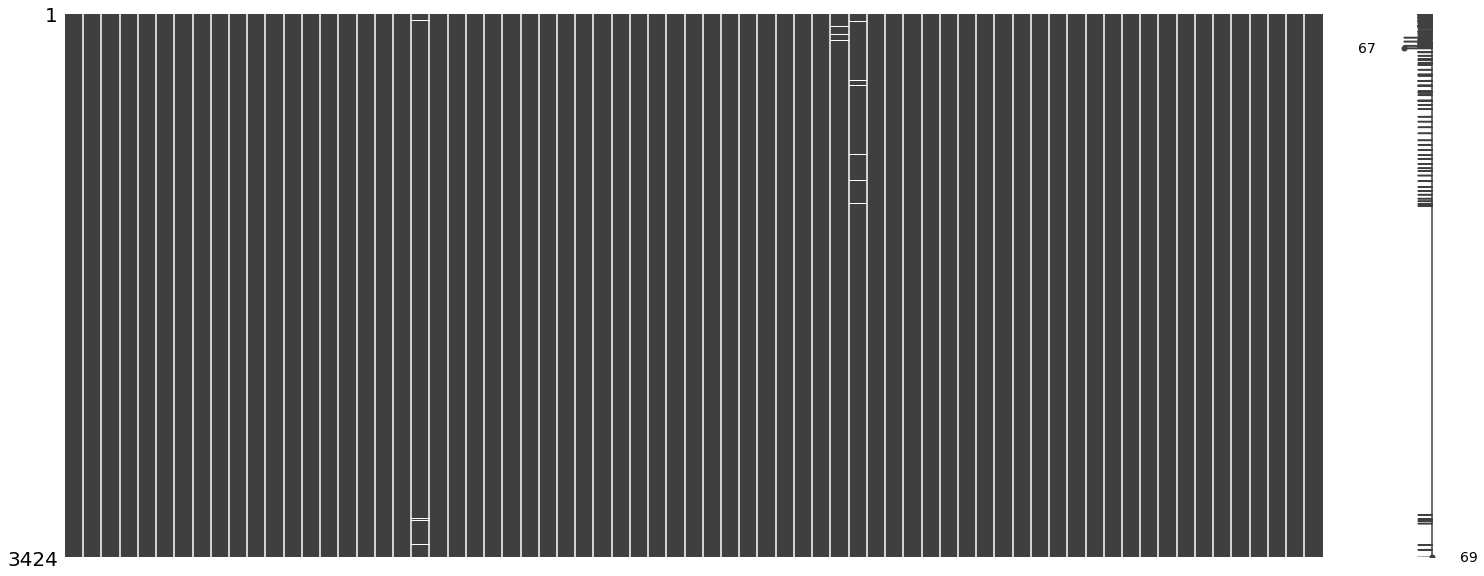

In [6]:
import missingno as msno
%matplotlib inline
msno.matrix(mydata)

In [7]:
mydata.dropna(inplace=True)

In [8]:
mydata.shape

(3334, 69)

In [9]:
mydata.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
3       False
5       False
6       False
        ...  
3418    False
3419    False
3420    False
3421    False
3422    False
Length: 3334, dtype: bool>

# Target Class

In [10]:
 mydata["Persistency_Flag"].value_counts()
    

Non-Persistent    2067
Persistent        1267
Name: Persistency_Flag, dtype: int64

In [11]:
 mydata["Persistency_Flag"].value_counts(normalize=True)*100

Non-Persistent    61.9976
Persistent        38.0024
Name: Persistency_Flag, dtype: float64

In [12]:
mydata["Persistency_Flag"].describe()

count               3334
unique                 2
top       Non-Persistent
freq                2067
Name: Persistency_Flag, dtype: object

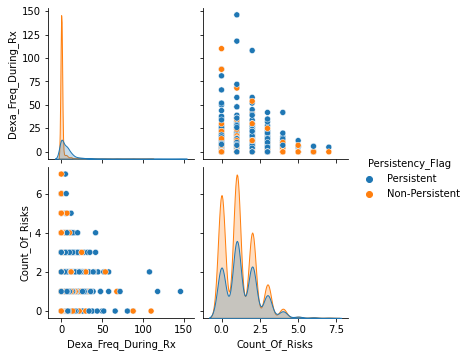

In [13]:
a=sns.pairplot(mydata, kind="scatter" ,hue="Persistency_Flag");
a

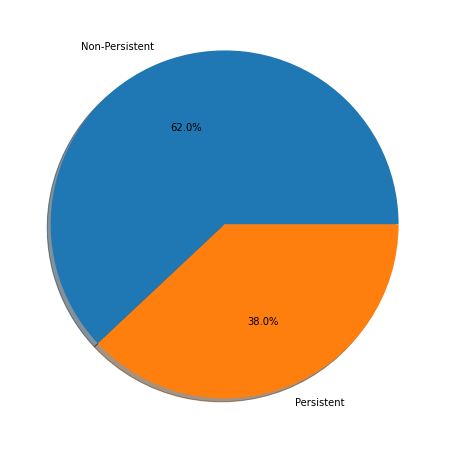

In [14]:
sorted_counts=mydata["Persistency_Flag"].value_counts()
plt.figure(figsize=(12,8))
plt.pie(sorted_counts,labels=sorted_counts.index,shadow=True,autopct='%.1f%%')
plt.show()

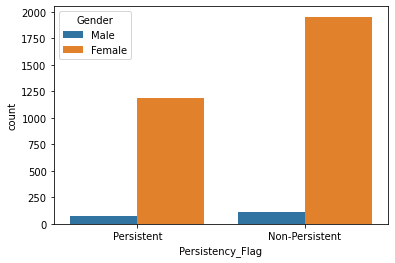

In [15]:
 sns.countplot(x="Persistency_Flag", hue='Gender', data=mydata)

# outliers detection and removal

In [16]:
cat_cols = mydata.select_dtypes(include = 'object')
num_cols =mydata.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')
Categorical Columns are :  Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspect

In [17]:
out=[]
def detect_outliers(mydata):
    thres=3
    mean=np.mean(mydata)
    sd= np.std(mydata)
    
    for i in mydata:
        z_score = (i-mean)/sd
        if np.abs(z_score)>thres:
            out.append(i)
    return out

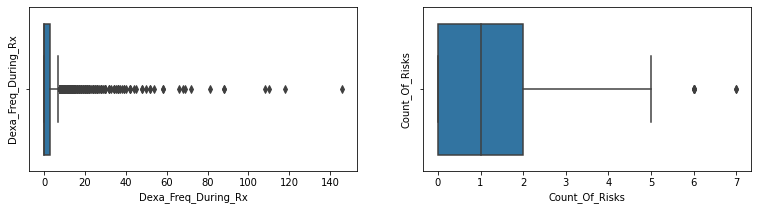

In [18]:
 plt.figure(figsize=(20,50))
for i,col in enumerate(num_cols,1):
    plt.subplot(14,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

In [19]:
def out(data,variable):
    dflv = mydata[variable]
    dflv_Q1 = dflv.quantile(0.25)
    dflv_Q3 = dflv.quantile(0.75)
    dflv_IQR = dflv_Q3 - dflv_Q1
    dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
    dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)
    return dflv_lowerend, dflv_upperend

In [20]:
low,up = out(mydata,"Count_Of_Risks")
print(low)
print(up)

-3.0
5.0


In [21]:
lowend,upend = out(mydata,"Dexa_Freq_During_Rx")
print(lowend)
print(upend)

-4.5
7.5


In [22]:
mydata["Dexa_Freq_During_Rx"] = np.where(mydata["Dexa_Freq_During_Rx"]>upend,upend,
                                    np.where(mydata["Dexa_Freq_During_Rx"]<lowend,lowend,mydata["Dexa_Freq_During_Rx"]))

In [23]:
mydata["Count_Of_Risks"] = np.where(mydata["Count_Of_Risks"]>up,up,
                                    np.where(mydata["Count_Of_Risks"]<low,low,mydata["Count_Of_Risks"]))

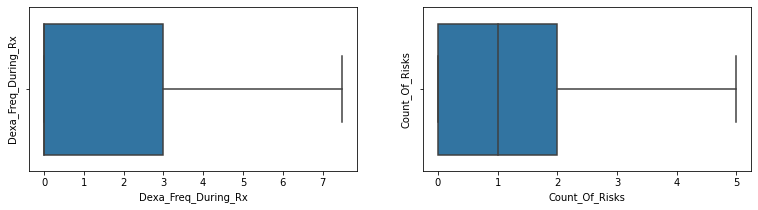

In [24]:
 plt.figure(figsize=(20,50))
for i,col in enumerate(num_cols,1):
    plt.subplot(14,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

# Label Encoder for Non-Numeric columns

In [25]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3422
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Ptid                                                                3334 non-null   object 
 1   Persistency_Flag                                                    3334 non-null   object 
 2   Gender                                                              3334 non-null   object 
 3   Race                                                                3334 non-null   object 
 4   Ethnicity                                                           3334 non-null   object 
 5   Region                                                              3334 non-null   object 
 6   Age_Bucket                                                          3334 non-null   object 
 7   Ntm_Speciality 

In [26]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in mydata:
    mydata[i] = LE.fit_transform(mydata[i].astype(str).values)

In [27]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3422
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Ptid                                                                3334 non-null   int64
 1   Persistency_Flag                                                    3334 non-null   int64
 2   Gender                                                              3334 non-null   int64
 3   Race                                                                3334 non-null   int64
 4   Ethnicity                                                           3334 non-null   int64
 5   Region                                                              3334 non-null   int64
 6   Age_Bucket                                                          3334 non-null   int64
 7   Ntm_Speciality                   

# Seperating input variables and output variable

In [28]:
x_ind=mydata.drop("Persistency_Flag",axis=1)
x_ind

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,1,2,1,4,3,5,0,1,0,0,0,0,0,0,1,1,2,0,1,2,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1084,1,1,1,4,0,5,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2703,0,2,1,0,3,5,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,2910,0,2,1,0,3,5,0,1,0,0,0,0,0,0,0,0,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2
6,3017,0,2,1,0,3,5,0,1,0,0,2,1,0,0,0,0,1,2,2,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,2639,0,2,1,3,1,34,0,1,1,0,0,0,0,0,1,1,1,2,2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3419,2641,0,2,1,3,3,5,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3420,2642,0,2,1,3,3,34,0,1,0,0,0,0,0,0,0,0,1,2,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3421,2643,0,2,1,3,3,3,1,0,0,0,7,1,0,0,1,1,0,0,1,3,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [29]:
y_dep=mydata.iloc[:,1:2]
y_dep

,Persistency_Flag
0,1
1,0
3,0
5,0
6,0
...,...
3418,0
3419,1
3420,1
3421,1


# Splitting of data into Training and Testing dataset for ML Models

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=1)

In [32]:
from sklearn.feature_selection import RFE

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model=RandomForestClassifier()

In [35]:
FS_Recursive=RFE(model)

In [36]:
fit=FS_Recursive.fit(x_train,y_train)

In [37]:
fit.support_

array([ True, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [38]:
fit.ranking_

array([ 1, 19, 13, 23,  1,  1,  1,  7,  1,  8,  3,  1,  1, 11, 14, 12,  1,
        1,  1,  1,  1, 15,  6, 17,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  5,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  9,  1, 25, 33, 24,
       35, 22, 32, 20, 10, 16, 30, 18, 28,  4, 21, 26, 29, 34, 31, 27,  1])

In [39]:
sel_features=x_train.columns[(fit.get_support())]

In [40]:
scores=pd.DataFrame(fit.support_,columns=["Score"])
dfcolumns=pd.DataFrame(x_ind.columns)

In [41]:
features_rank=pd.concat([dfcolumns,scores],axis=1)

In [42]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Ptid,True
1,Gender,False
2,Race,False
3,Ethnicity,False
4,Region,True
...,...,...
63,Risk_Hysterectomy_Oophorectomy,False
64,Risk_Estrogen_Deficiency,False
65,Risk_Immobilization,False
66,Risk_Recurring_Falls,False


In [43]:
print(sel_features)

Index(['Ptid', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_diseas

In [44]:
x_ind = mydata[['Ptid','Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines', 'Count_Of_Risks']]

In [45]:
mydata1=mydata[['Ptid','Persistency_Flag', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines', 'Count_Of_Risks']]

# New dataframe after  Feature selection

In [46]:
mydata1

,Ptid,Persistency_Flag,Region,Age_Bucket,Ntm_Speciality,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Dexa_During_Rx,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Idn_Indicator,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Count_Of_Risks
0,0,1,4,3,5,1,0,0,1,2,0,1,2,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1084,0,4,0,5,1,0,0,1,1,2,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2703,0,0,3,5,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1
5,2910,0,0,3,5,1,0,0,0,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2
6,3017,0,0,3,5,1,2,1,0,1,2,2,2,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,2639,0,3,1,34,1,0,0,1,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3419,2641,1,3,3,5,1,0,0,1,1,2,2,2,1,1,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1
3420,2642,1,3,3,34,1,0,0,0,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3421,2643,1,3,3,3,0,7,1,1,0,0,1,3,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1


# Correlation between variables

In [47]:
mydata_corr=mydata1.corr()
mydata_corr

,Ptid,Persistency_Flag,Region,Age_Bucket,Ntm_Speciality,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Dexa_During_Rx,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Idn_Indicator,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Count_Of_Risks
Ptid,1.000000,-0.021668,-0.149989,0.069754,-0.023839,0.008248,0.004118,0.006922,-0.023784,-0.049640,-0.047262,-0.007273,-0.047667,0.262798,0.025321,-0.003390,-0.039850,0.035219,0.001274,-0.043036,0.018273,0.028166,-0.013986,-0.012104,0.038858,0.026998,0.042935,0.062306,0.011941,0.016684,0.032333,0.014815,0.093363,-0.048374,0.032425
Persistency_Flag,-0.021668,1.000000,0.079706,-0.001172,-0.006834,-0.112679,0.514536,0.493361,0.016339,-0.003122,-0.150631,-0.089446,-0.022594,0.105069,0.321638,0.313131,0.288264,0.173978,0.233898,0.212498,0.352426,0.217101,0.216809,0.249206,0.162753,0.219464,0.129185,0.243222,0.109903,0.182847,0.220716,0.220068,0.220421,0.217769,0.085228
Region,-0.149989,0.079706,1.000000,0.005894,-0.082451,-0.090840,0.014194,-0.003557,0.006085,0.011168,-0.023540,-0.062012,-0.006642,0.019233,0.024677,0.063817,0.085025,0.065844,0.043266,0.008656,-0.055809,0.014343,0.080502,-0.029681,0.038124,-0.024878,0.023594,-0.005974,-0.008652,0.018402,0.029031,0.034273,-0.029575,0.120764,0.083139
Age_Bucket,0.069754,-0.001172,0.005894,1.000000,-0.008869,-0.005200,-0.039116,-0.039558,-0.138148,-0.136272,0.019241,0.049615,-0.056799,0.020668,-0.156591,0.071317,-0.030025,-0.016029,0.012279,-0.117375,0.038673,0.060675,0.029665,-0.058682,0.137360,0.053221,0.106132,0.013299,-0.025511,0.048227,0.031710,-0.020904,-0.020803,0.025380,-0.030227
Ntm_Speciality,-0.023839,-0.006834,-0.082451,-0.008869,1.000000,0.543079,-0.031715,-0.021177,0.043336,0.008634,-0.020230,0.000737,0.018747,0.117971,-0.072164,-0.085037,-0.078480,-0.013461,0.038789,-0.016311,0.092044,0.021938,0.010946,-0.005074,-0.066432,-0.000553,-0.016501,0.095603,-0.012095,-0.010550,0.021173,-0.042276,0.027401,0.000911,0.000936
Ntm_Speciality_Bucket,0.008248,-0.112679,-0.090840,-0.005200,0.543079,1.000000,-0.091828,-0.106008,-0.011053,-0.018963,-0.005086,0.028251,0.007726,-0.041922,-0.036524,-0.021476,-0.063947,-0.013495,0.030823,-0.032796,-0.009126,0.049836,-0.010251,-0.117519,-0.038491,0.012354,-0.036079,0.073831,0.013694,-0.035314,-0.048732,-0.056312,-0.017393,-0.030242,-0.015850
Dexa_Freq_During_Rx,0.004118,0.514536,0.014194,-0.039116,-0.031715,-0.091828,1.000000,0.943700,-0.012087,-0.000363,-0.138696,-0.084971,-0.050768,0.026835,0.290626,0.246428,0.230965,0.130243,0.160059,0.215994,0.246372,0.174675,0.168572,0.239562,0.131729,0.154868,0.074449,0.120744,0.072182,0.116179,0.138905,0.163324,0.166541,0.106711,0.065813
Dexa_During_Rx,0.006922,0.493361,-0.003557,-0.039558,-0.021177,-0.106008,0.943700,1.000000,-0.012061,0.004680,-0.133040,-0.074509,-0.047418,0.037847,0.275219,0.216803,0.218594,0.124441,0.159845,0.193438,0.240142,0.158765,0.151772,0.247055,0.125634,0.145040,0.075872,0.125258,0.080918,0.119915,0.135507,0.147789,0.171723,0.103350,0.072144
Tscore_Bucket_Prior_Ntm,-0.023784,0.016339,0.006085,-0.138148,0.043336,-0.011053,-0.012087,-0.012061,1.000000,0.582476,0.221639,0.062755,0.334615,0.072204,0.0430

# Exploratory Data Analysis

# Correlogram

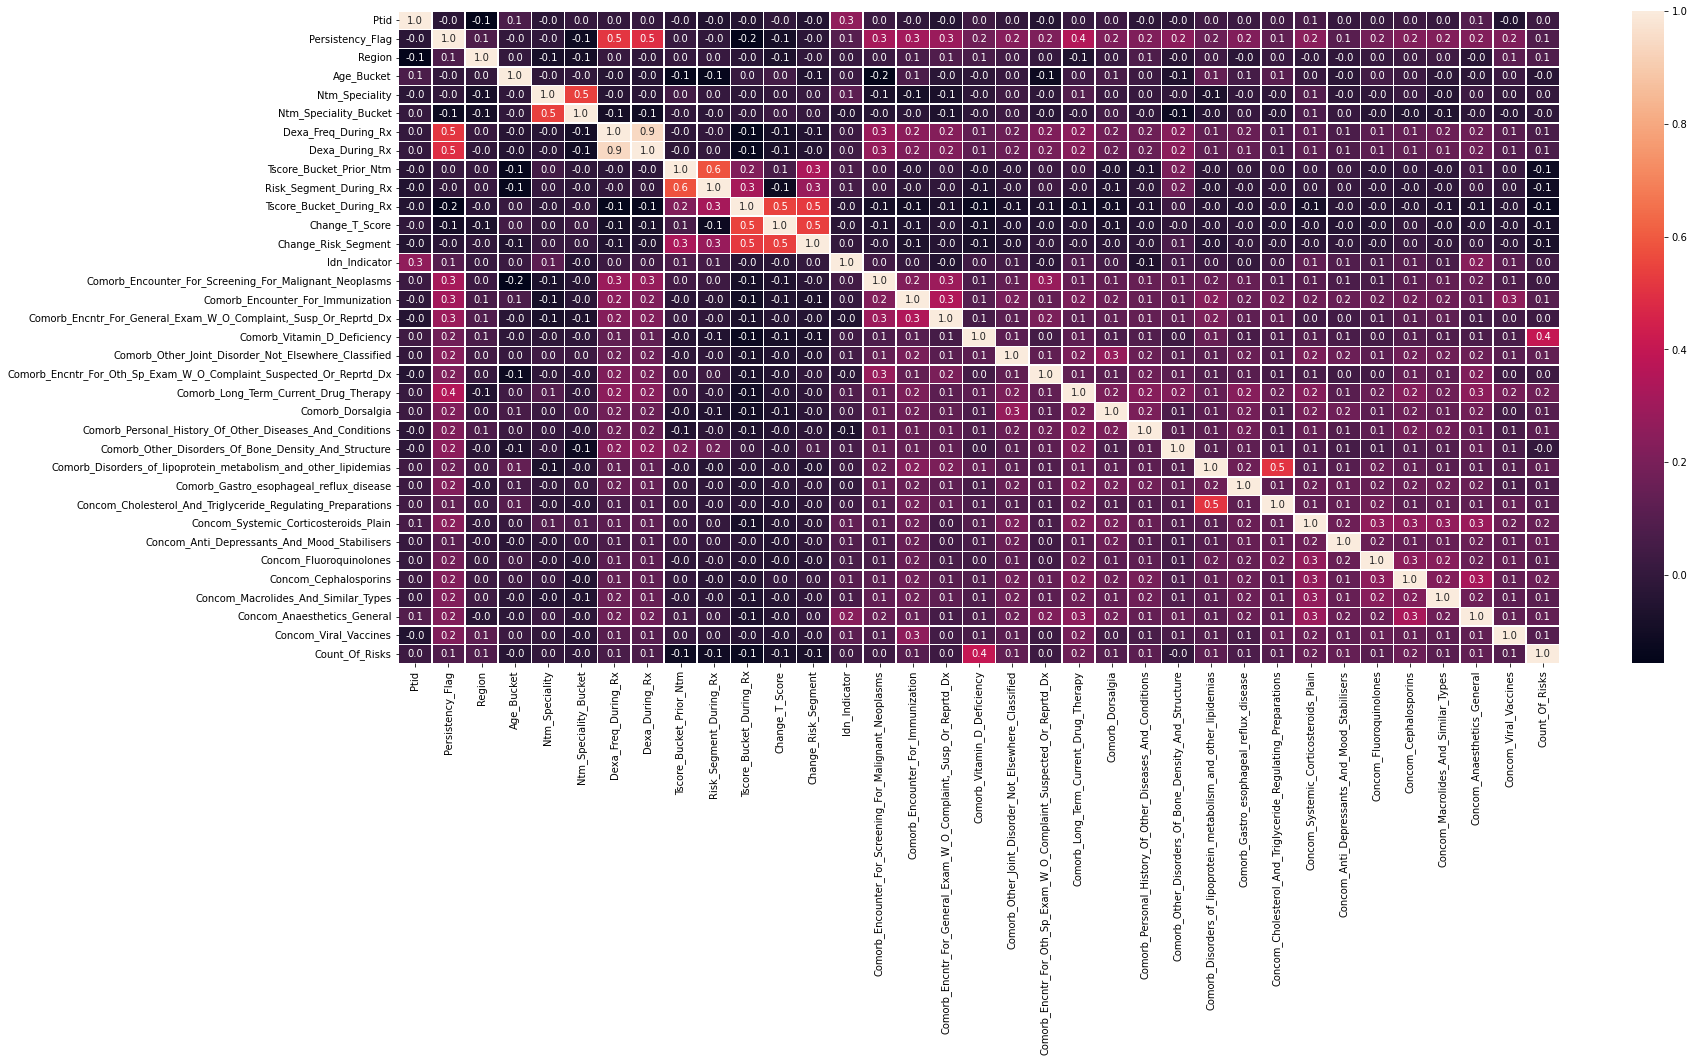

In [48]:

f,ax=plt.subplots(figsize=(26,12))
sns.heatmap(mydata_corr,annot=True ,linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
 

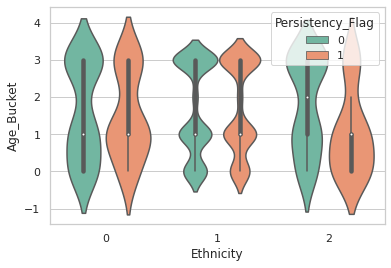

In [160]:
 ax = sns.violinplot(x="Ethnicity", y="Age_Bucket", hue="Persistency_Flag",
                    data= mydata, palette="Set2")

In [50]:
#sns.pairplot(mydata1)

In [159]:
import plotly.express as px
  
df =  mydata
  
fig = px.scatter_3d(df, x = 'Count_Of_Risks', 
                    y = 'Persistency_Flag', z = 'Change_T_Score',
                    color = 'Gender')
  
fig.show()

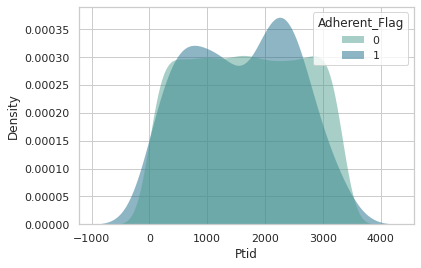

In [153]:
sns.kdeplot(
   data=mydata, x="Ptid", hue="Adherent_Flag",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

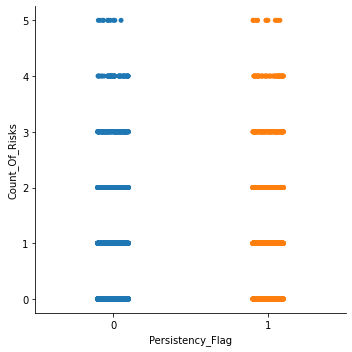

In [53]:
sns.catplot(x="Persistency_Flag",y= "Count_Of_Risks",data=mydata);

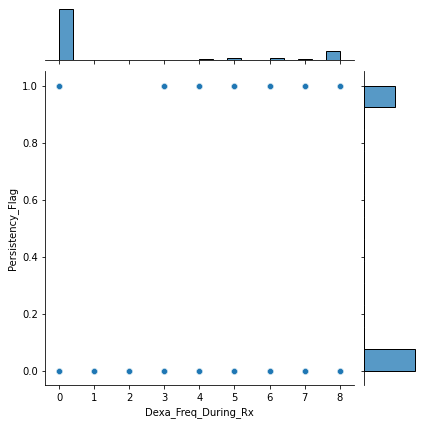

In [54]:
import plotly.express as px
df = px.data.gapminder()
sns.jointplot(data=mydata,x="Gender", y="Persistency_Flag" ,legend=False, sizes=(60, 4000))

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

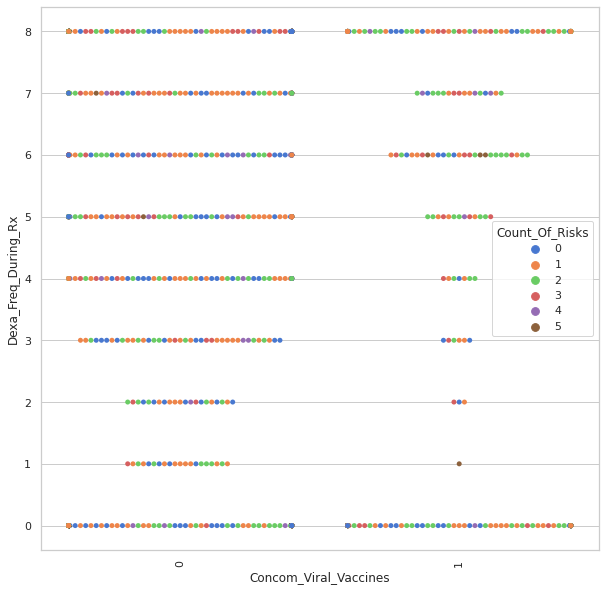

In [56]:
sns.set(style="whitegrid", palette="muted")
data_dia = y_dep
data = x_ind
data_n_2 = (mydata1 - data.mean()) / (mydata1.std())              # standardization
data = pd.concat([y_dep,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(mydata1,id_vars="Ptid",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
 
sns.swarmplot(x="Persistency_Flag", y="'Tscore_Bucket_Prior_Ntm", hue="Count_Of_Risks", data=mydata1)

plt.xticks(rotation=90)

# standardisation

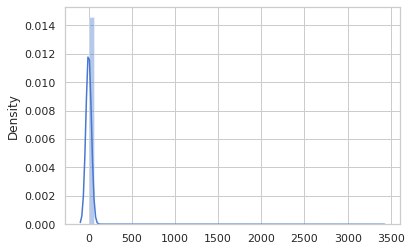

In [57]:
sns.distplot(x_ind)

In [58]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
xnorm=norm.fit_transform(x_ind)

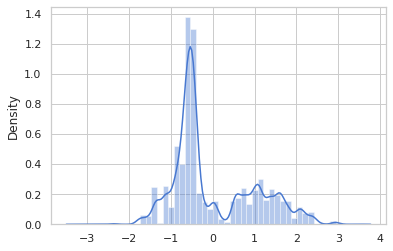

In [59]:
sns.distplot(xnorm)

# Model building

# Logistic Regression Model

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnorm,y_dep,train_size=0.8,random_state=2)

In [61]:
import statsmodels.api as sm

In [62]:
model_stat=sm.Logit(y_train,x_train).fit();

Optimization terminated successfully.
         Current function value: 0.432325
         Iterations 7


In [63]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.350      
Dependent Variable: Persistency_Flag AIC:              2374.0219  
Date:               2022-01-16 12:58 BIC:              2574.2381  
No. Observations:   2667             Log-Likelihood:   -1153.0    
Df Model:           33               LL-Null:          -1775.2    
Df Residuals:       2633             LLR p-value:      2.4889e-240
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1     -0.1395      0.0548    -2.5439    0.0110    -0.2469    -0.0320
x2      0.1314      0.0548     2.3955    0.0166     0.0239     0.2389
x3      0.0565      0.0555     1.0177    0.3088    -0.0523     0.1652
x4      0.1033      0.0628     1.6448    0.1000    -0.0198     0.2265
x5     -0.2826      0.0641    -4.4110    0.0000    -0.4082    -0.1571
x6      1.1379      0.1745     6.5222    0.0000     0.7960     1.4799
x7     -0.0555      0.1581    -0.3512    0.7255    -0.3654     0.2543
x8     -0.0184      0.0688    -0.2673    0.7892    -0.1533     0.1165
x9     -0.0629      0.0734    -0.8562    0.3919    -0.2068     0.0811
x10    -0.1788      0.0744    -2.4032    0.0163    -0.3246    -0.0330
x11    -0.0743      0.0794    -0.9356    0.3495    -0.2298     0.0813
x12     0.2655      0.0723     3.6733    0.0002     0.1238     0.4072
x13     0.1908      0.0583     3.2748    0.0011     0.0766     0.3049
x14     0.2893      0.0562     5.1513    0.0000     0.1792     0.3993
x15     0.1848      0.0585     3.1614    0.0016     0.0702     0.2994
x16     0.2608      0.0563     4.6358    0.0000     0.1506     0.3711
x17     0.2579      0.0572     4.5104    0.0000     0.1458     0.3700
x18     0.1794      0.0552     3.2467    0.0012     0.0711     0.2876
x19     0.1256      0.0569     2.2068    0.0273     0.0140     0.2371
x20     0.3912      0.0586     6.6741    0.0000     0.2763     0.5061
x21     0.0932      0.0565     1.6494    0.0991    -0.0176     0.2040
x22     0.0853      0.0573     1.4883    0.1367    -0.0270     0.1976
x23     0.2280      0.0591     3.8592    0.0001     0.1122     0.3437
x24    -0.0812      0.0628    -1.2930    0.1960    -0.2043     0.0419
x25     0.1523      0.0565     2.6975    0.0070     0.0416     0.2630
x26    -0.0128      0.0611    -0.2096    0.8340    -0.1326     0.1070
x27     0.2126      0.0575     3.7002    0.0002     0.1000     0.3252
x28    -0.0214      0.0552    -0.3875    0.6984    -0.1295     0.0868
x29     0.0953      0.0564     1.6880    0.0914    -0.0153     0.2059
x30     0.1233      0.0587     2.1020    0.0356     0.0083     0.2383
x31     0.1112      0.0580     1.9178    0.0551    -0.0024     0.2248
x32     0.0946      0.0621     1.5237    0.1276    -0.0271     0.2163
x33     0.2612      0.0587     4.4511    0.0000     0.1462     0.3763
x34    -0.1793      0.0601    -2.9810    0.0029    -0.2972    -0.0614
==================================================================

"""

In [64]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [65]:
model1.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred=model1.predict(x_test)

In [67]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [151]:
accuracy_score(y_test,y_pred)

0.7991004497751124

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [70]:
logis_roc_auc=roc_auc_score(y_test,y_pred)
logis_roc_auc

0.7841425669793983

In [71]:
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])              #[:,1] - for 1st column (PROBABILITY COLUMN)
                                                                                    #fpr - false positive rate
                                                                                    #tpr- true positive rate

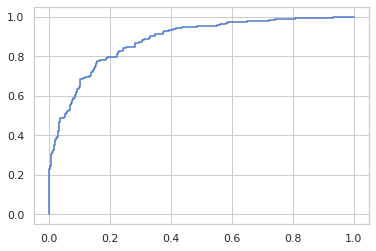

In [72]:
plt.plot(fpr,tpr,logis_roc_auc)

In [73]:
roc_threshold=LogisticRegression(class_weight='balanced')
roc_threshold.fit(x_train,y_train)
THRESHOLD=0.6

In [74]:
y_pred_roc=np.where(roc_threshold.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

In [75]:
y_pred_roc

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [152]:
acc_logreg=accuracy_score(y_test,y_pred_roc)

In [77]:
from sklearn.metrics import classification_report

In [78]:
class_report_logistic = classification_report(y_test,y_pred_roc)

In [79]:
print(class_report_logistic)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       422
           1       0.75      0.69      0.72       245

    accuracy                           0.80       667
   macro avg       0.79      0.78      0.79       667
weighted avg       0.80      0.80      0.80       667



# Decision tree model

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtmodel = DecisionTreeClassifier()

In [82]:
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
dtpred = dtmodel.predict(x_test)

In [84]:
accuracy_score(y_test,dtpred)

0.7391304347826086

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),'max_features':('log2','auto','sqrt'),
            'min_samples_split':(2,4,6)}

In [87]:
dt=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameters,cv=5,random_state=3)

In [88]:
dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 20, 30, 40, 50, 60,
                                                      70, 100),
                                        'max_features': ('log2', 'auto',
                                                         'sqrt'),
                                        'min_samples_split': (2, 4, 6)},
                   random_state=3)

In [89]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [90]:
dmodel = DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [91]:
dmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [92]:
dpred = dmodel.predict(x_test)

In [93]:
acc_decisiontree=accuracy_score(y_test,dpred)

In [94]:
acc_decisiontree

0.7661169415292354

In [95]:
class_report_Dtree= classification_report(y_test,dpred)

In [96]:
print(class_report_Dtree)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       422
           1       0.70      0.63      0.67       245

    accuracy                           0.77       667
   macro avg       0.75      0.74      0.74       667
weighted avg       0.76      0.77      0.76       667



# Random forest model

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfmodel = RandomForestClassifier(random_state=3)

In [99]:
rfmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

In [100]:
rfpred = rfmodel.predict(x_test)

In [101]:
accuracy_score(y_test,rfpred)

0.815592203898051

In [102]:
param={'n_estimators':(200,300,400,500),'max_features':('auto','sqrt','log2'), 'min_samples_split':(2,4,6),
       'random_state':(0,1,2,3,4,5)}
param

{'max_features': ('auto', 'sqrt', 'log2'),
 'min_samples_split': (2, 4, 6),
 'n_estimators': (200, 300, 400, 500),
 'random_state': (0, 1, 2, 3, 4, 5)}

In [103]:
RF=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param,cv=5,random_state=3)

In [104]:
RF.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (200, 300, 400, 500),
                                        'random_state': (0, 1, 2, 3, 4, 5)},
                   random_state=3)

In [105]:
RF.best_estimator_

RandomForestClassifier(max_features='log2', min_samples_split=4,
                       n_estimators=300, random_state=3)

In [106]:
rmodel = RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=300, random_state=4)

In [107]:
rmodel.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=300, random_state=4)

In [108]:
rpred = rmodel.predict(x_test)

In [109]:
acc_randomforest=accuracy_score(y_test,rpred)
acc_randomforest

0.8185907046476761

In [110]:
class_report_randomforest = classification_report(y_test,rpred)

In [111]:
 print(class_report_randomforest)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       422
           1       0.78      0.70      0.74       245

    accuracy                           0.82       667
   macro avg       0.81      0.79      0.80       667
weighted avg       0.82      0.82      0.82       667



# AdaBoost classifier model

In [112]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [113]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [114]:
adpred = ada.predict(x_test)

In [115]:
accuracy_score(y_test,adpred)

0.8125937031484258

In [116]:
class_report_adaboost = classification_report(y_test,adpred)

In [117]:
print(class_report_adaboost)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       422
           1       0.78      0.69      0.73       245

    accuracy                           0.81       667
   macro avg       0.80      0.79      0.79       667
weighted avg       0.81      0.81      0.81       667



XGBoost claasifier

In [118]:
import xgboost as xgb

In [119]:
xgmodel = xgb.XGBClassifier()

In [120]:
xgmodel.fit(x_train,y_train)

XGBClassifier()

In [121]:
xgpred = xgmodel.predict(x_test)

In [122]:
acc_gbk=accuracy_score(y_test,xgpred)
acc_gbk

0.8275862068965517

In [123]:
class_report_xgb = classification_report(y_test,xgpred)

# KNN model

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
mydata.shape

(3334, 69)

In [126]:
np.sqrt(3424)

58.51495535331117

In [127]:
knn = KNeighborsClassifier(n_neighbors=59,p=2,metric='euclidean')

In [128]:
kmodel = knn.fit(x_train,y_train)

In [129]:
kpred = kmodel.predict(x_test)

In [130]:
acc_knn=accuracy_score(y_test,kpred)
acc_knn

0.7646176911544228

In [131]:
class_report_knn = classification_report(y_test,kpred)

In [132]:
 print(class_report_knn)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       422
           1       0.83      0.45      0.58       245

    accuracy                           0.76       667
   macro avg       0.79      0.70      0.71       667
weighted avg       0.78      0.76      0.74       667



# SVM model

In [133]:
from sklearn.svm import SVC

In [134]:
model = SVC(kernel='linear')

In [135]:
f_model=model.fit(x_train,y_train)

In [136]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [137]:
acc_svc=accuracy_score(y_test,y_pred)

In [138]:
f_model.n_support_

array([584, 574], dtype=int32)

In [139]:
kernel=['linear','rbf','poly','sigmoid']

In [140]:
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print('kernel:',i)
    print('Accuracy Score:',accuracy_score(y_test,model1.predict(x_test)))
    

kernel: linear
Accuracy Score: 0.7991004497751124
kernel: rbf
Accuracy Score: 0.8035982008995503
kernel: poly
Accuracy Score: 0.7901049475262368
kernel: sigmoid
Accuracy Score: 0.7646176911544228


In [161]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree', 'XGBoosting Classifier'],
    'Score': [acc_svc,acc_knn, acc_logreg, 
              acc_randomforest,acc_decisiontree,
              acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoosting Classifier,0.827586
3,Random Forest,0.818591
2,Logistic Regression,0.803598
0,Support Vector Machines,0.799100
4,Decision Tree,0.766117
1,KNN,0.764618


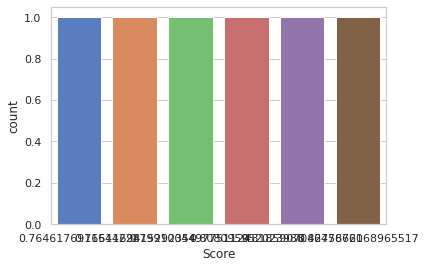

In [142]:
sns.countplot(x="Score",data=models)

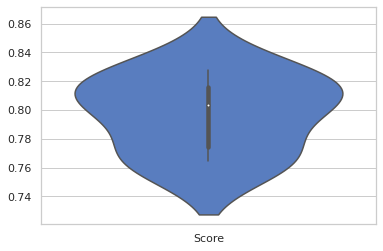

In [143]:
sns.violinplot(data=models)

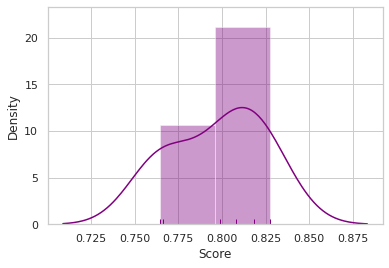

In [144]:
sns.distplot(models["Score"],color="purple",rug=True)

## K-FOLD CROSS VALIDATION

In [145]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest',"XGB","adaboost"]
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100),xgb.XGBClassifier(),AdaBoostClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,xnorm,y_dep, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.808618,0.020686
Radial Svm,0.814021,0.018013
Logistic Regression,0.808321,0.019984
KNN,0.795427,0.026106
Decision Tree,0.732139,0.016820
Random Forest,0.813122,0.014401
XGB,0.819417,0.018360
adaboost,0.810724,0.019770
